In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Titanic_Survival1.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

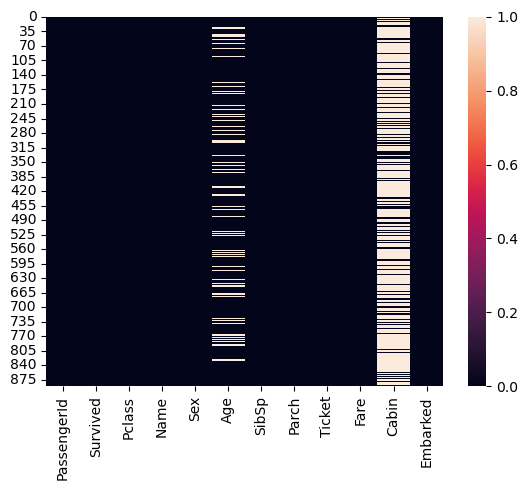

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.shape

(891, 12)

In [10]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
#3rd Class passengers were the Highest with 419 , then 1st class Passengers with 216 and then Second Class Passengers 184

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is a difference between Std and mean of Age and Fare, Hence skewness might be present
There are null Values present in Age column, Rest other columns have no null values
There is a difference in 75% and Max of Fare and Age , So Outliers might be present

Univariate Analysis

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [18]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

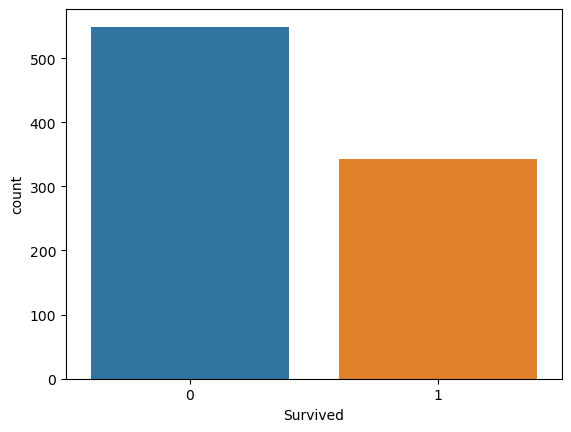

In [21]:
sns.countplot(x='Survived',data=df)

0 represents Non Survived and 1 represents Survived. Non Survival rate is more

<AxesSubplot:xlabel='Pclass', ylabel='count'>

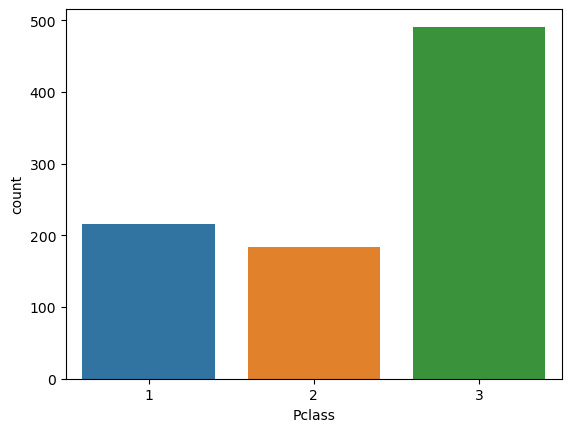

In [22]:
sns.countplot(x='Pclass',data=df)

Most of the passengers belongs to 3rd Class , then to 1st class then to 2nd class

<AxesSubplot:xlabel='Age', ylabel='count'>

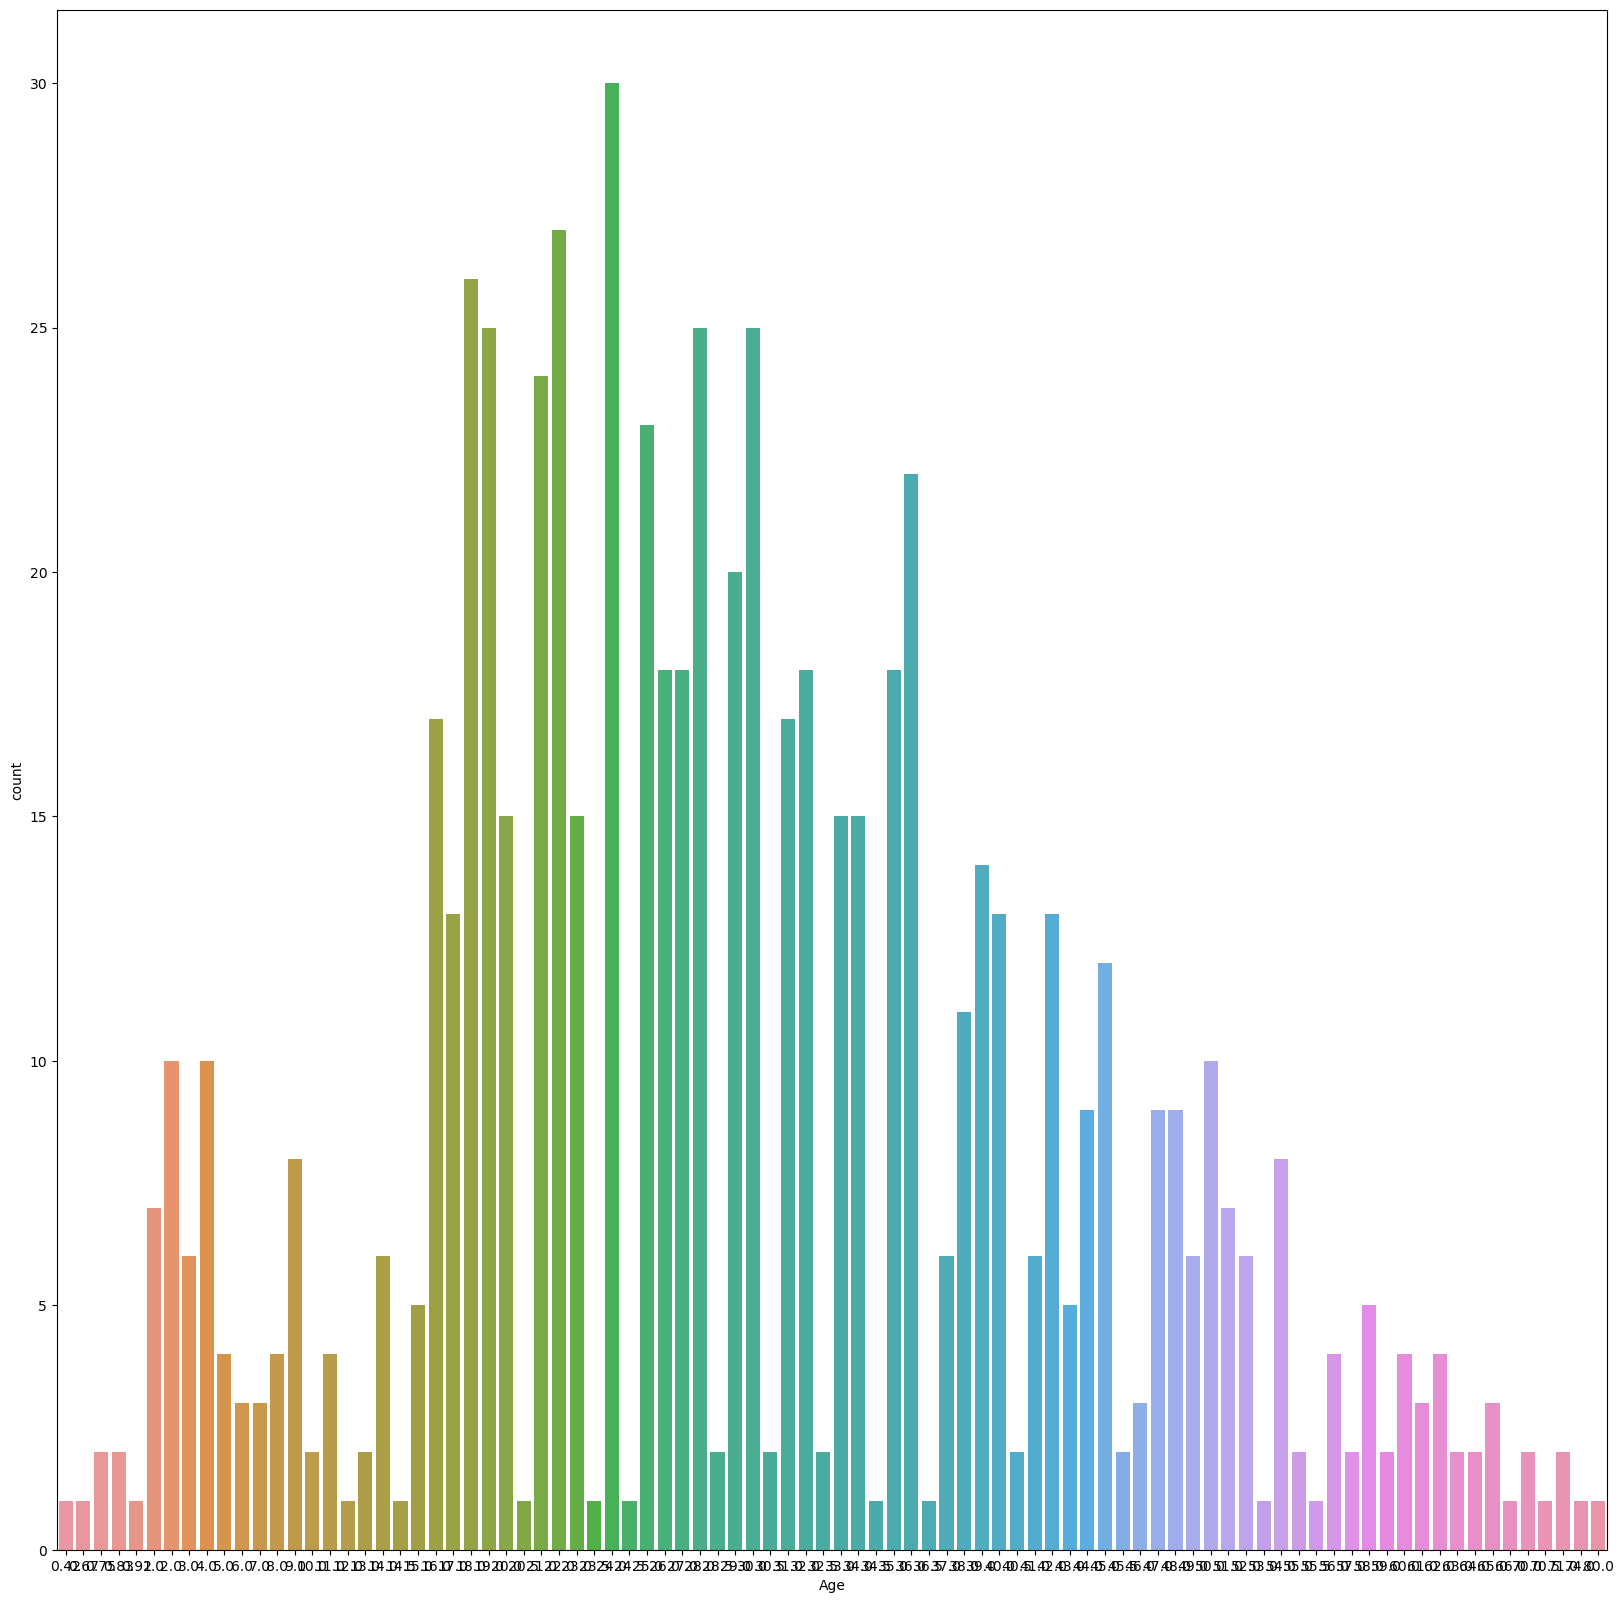

In [23]:
plt.figure(figsize=(20,20))
sns.countplot(x='Age',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

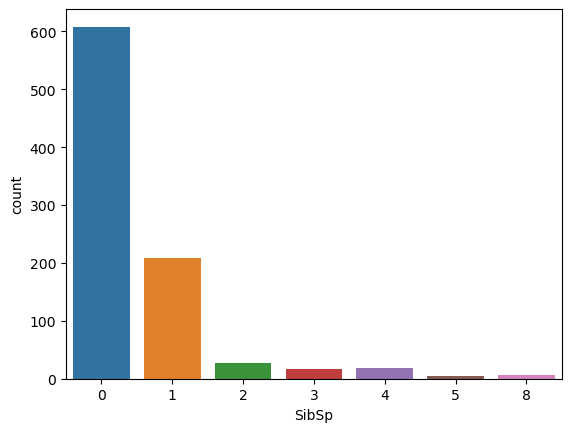

In [24]:
sns.countplot(x='SibSp',data=df)

Most of the Passengers on the ship were not with their siblings or spouse

<AxesSubplot:xlabel='Parch', ylabel='count'>

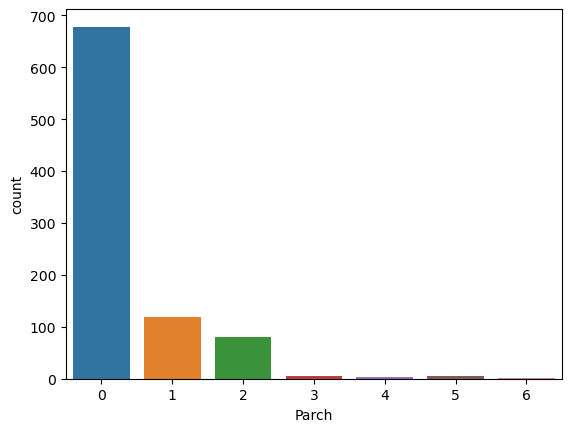

In [25]:
sns.countplot(x='Parch',data=df)

Most of the Passengers on the ship were not with their parents or Children

<AxesSubplot:xlabel='Fare', ylabel='count'>

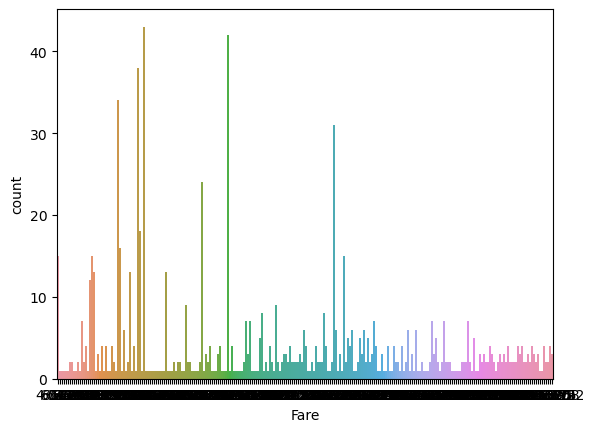

In [26]:
sns.countplot(x='Fare',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

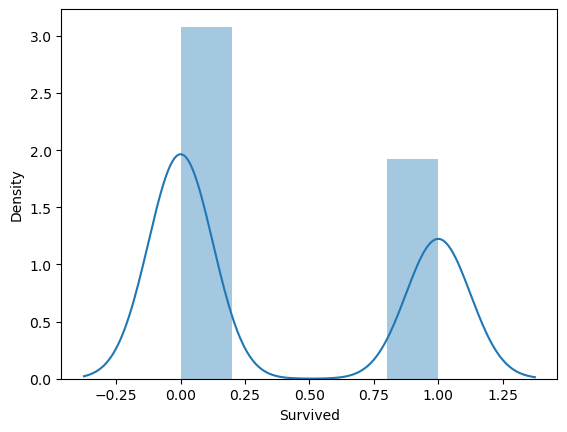

In [27]:
sns.distplot(df['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

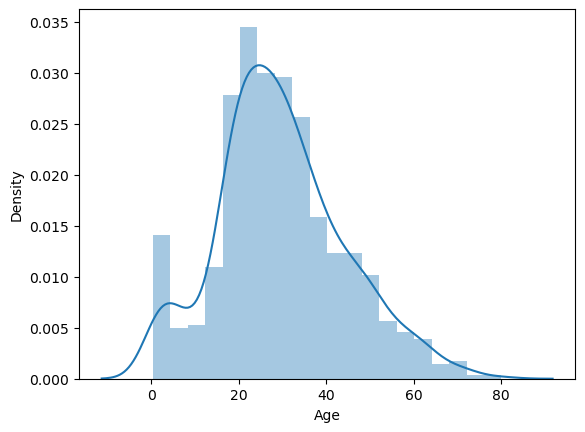

In [28]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

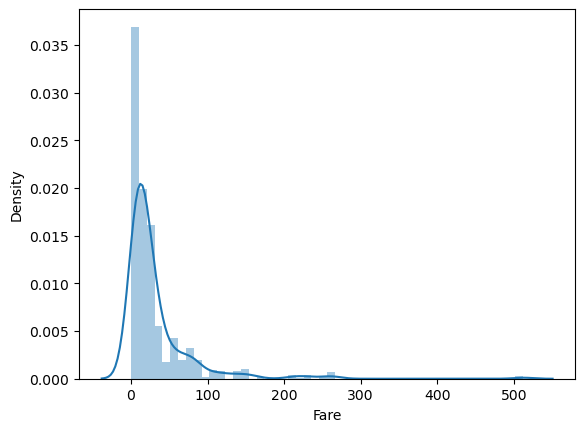

In [29]:
sns.distplot(df['Fare'])

There is skewness in Fare Column

In [30]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Bi Variate Analysis

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

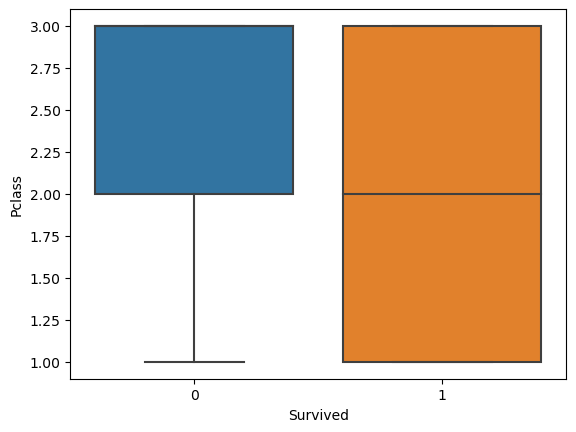

In [31]:
sns.boxplot(x='Survived',y='Pclass',data=df)

<AxesSubplot:xlabel='Survived'>

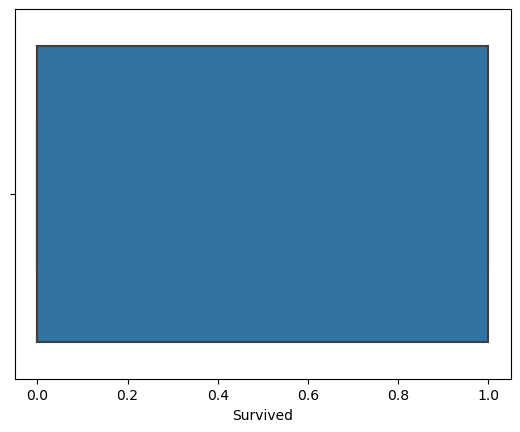

In [32]:
sns.boxplot(x='Survived',data=df)

<AxesSubplot:ylabel='Age'>

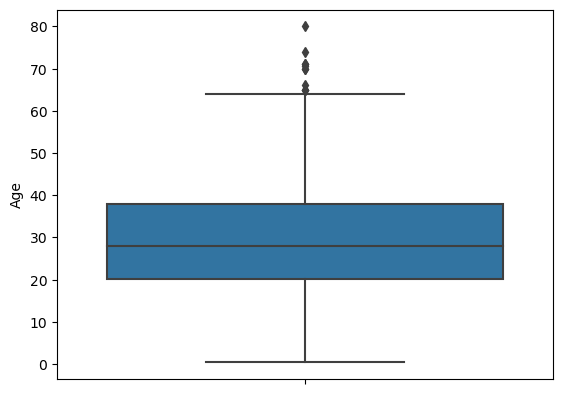

In [33]:
sns.boxplot(y='Age',data=df)

<AxesSubplot:ylabel='Fare'>

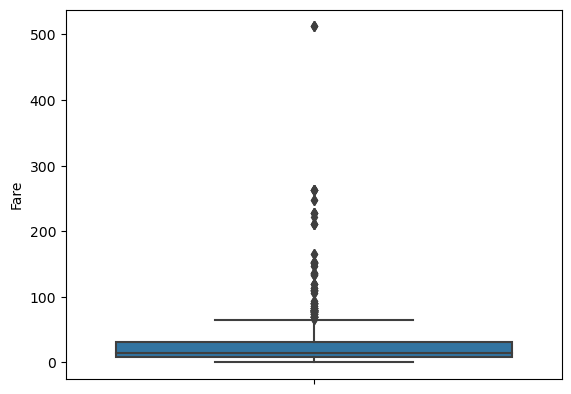

In [34]:
sns.boxplot(y='Fare',data=df)

There are Outliers Present in Fare Column

Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Survived'>

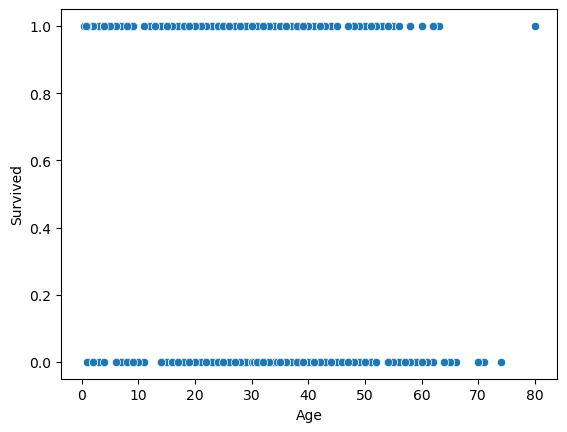

In [35]:
sns.scatterplot(y='Survived',x='Age',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

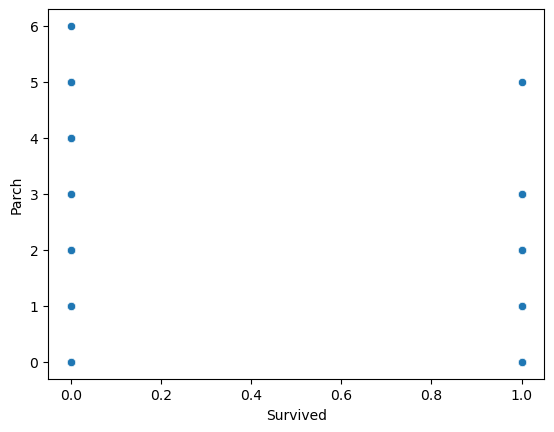

In [36]:
sns.scatterplot(x='Survived',y='Parch',data=df)

In [37]:
#sns.stripplot(x='Fare',y='Age',data=df,hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

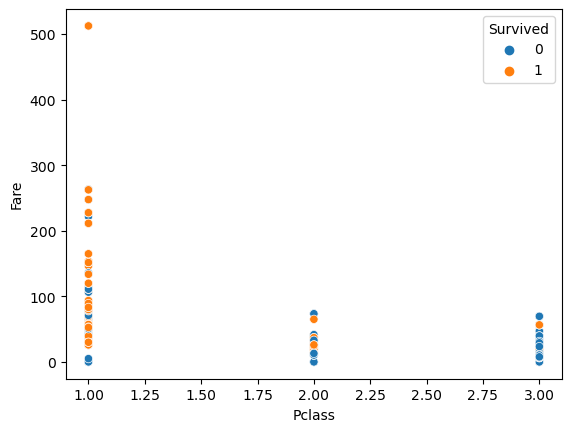

In [38]:
sns.scatterplot(x='Pclass',y='Fare',data=df,hue='Survived')

This represents that 1st class people survived the most, then second class and the least was third class

<AxesSubplot:xlabel='Parch', ylabel='SibSp'>

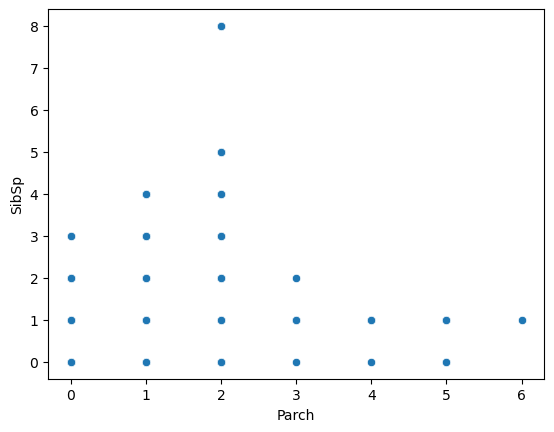

In [39]:
sns.scatterplot(x='Parch',y='SibSp',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

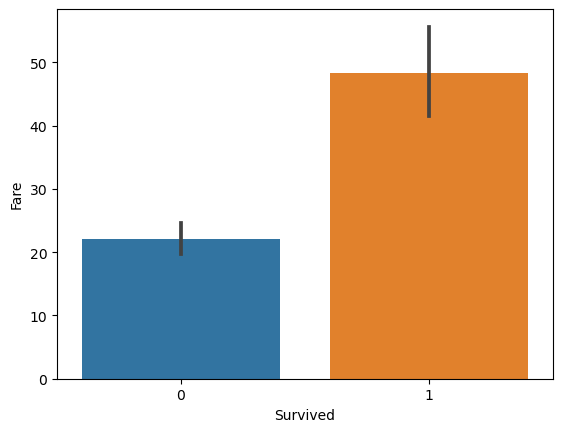

In [40]:
sns.barplot(x='Survived',y='Fare',data=df)

The passengers who paid more fare survived the most as compared to who paid less

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

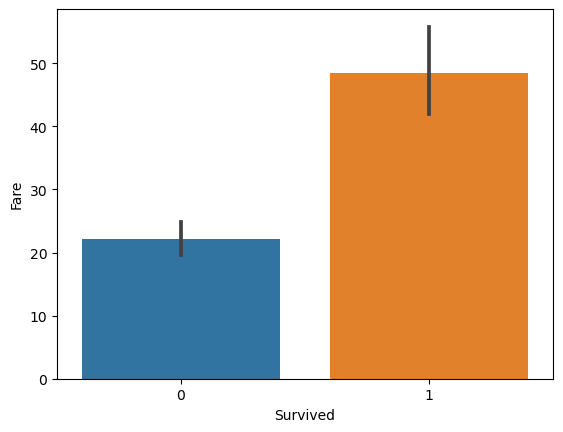

In [41]:
sns.barplot(x='Survived',y='Fare',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

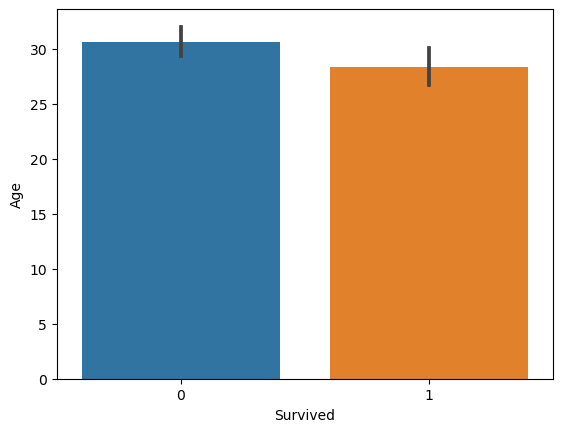

In [42]:
sns.barplot(x='Survived',y='Age',data=df)

In [43]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

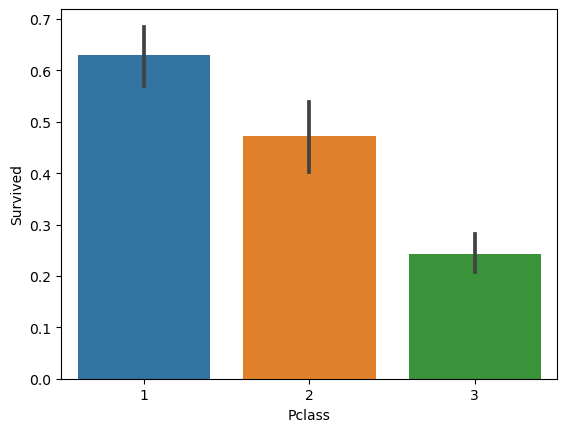

In [44]:
sns.barplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Cabin', ylabel='Pclass'>

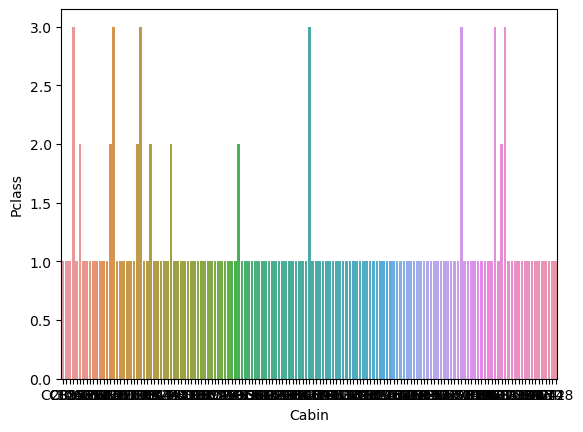

In [45]:
sns.barplot(x='Cabin',y='Pclass',data=df)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

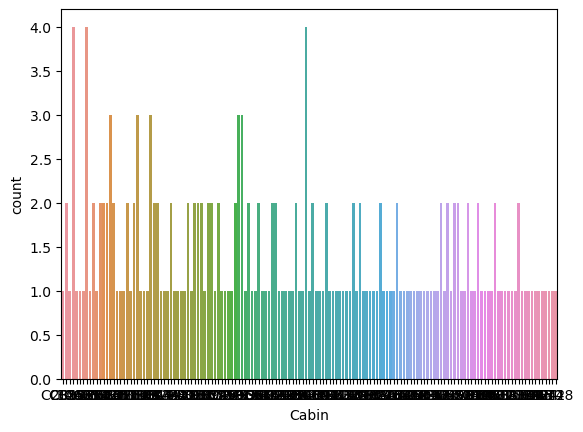

In [46]:
sns.countplot(x='Cabin',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

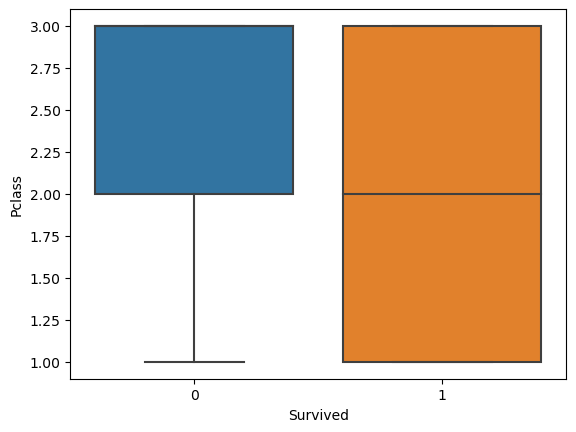

In [47]:
sns.boxplot(x='Survived',y='Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

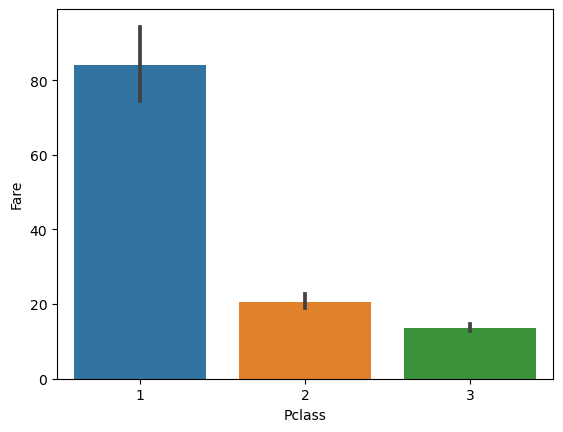

In [48]:
sns.barplot(x='Pclass',y='Fare',data=df)

Multi-Variate Analysis

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

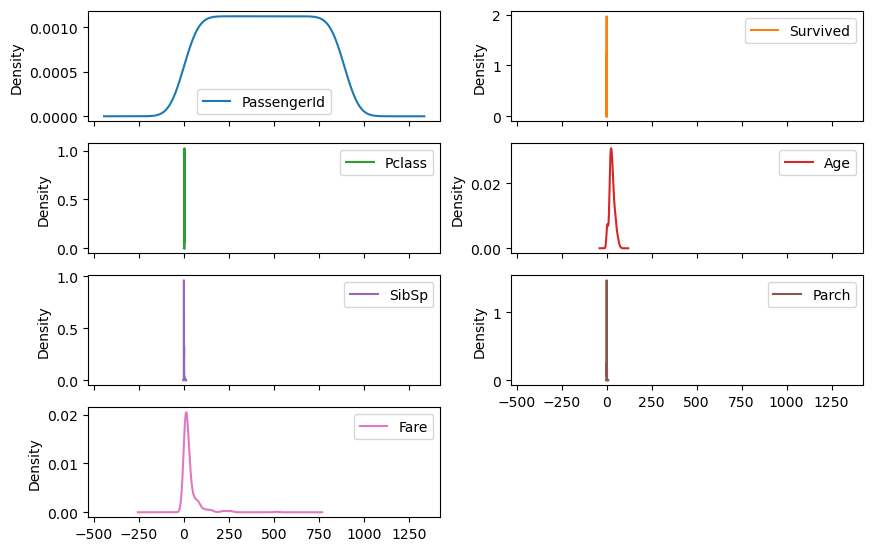

In [49]:
df.plot(kind='kde',subplots=True,figsize=(10,10),layout=(6,2))

In [50]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Survived       AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Pclass         AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Age               AxesSubplot(0.125,0.381765;0.227941x0.226471)
SibSp          AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Parch          AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Fare                  AxesSubplot(0.125,0.11;0.227941x0.226471)
dtype: object

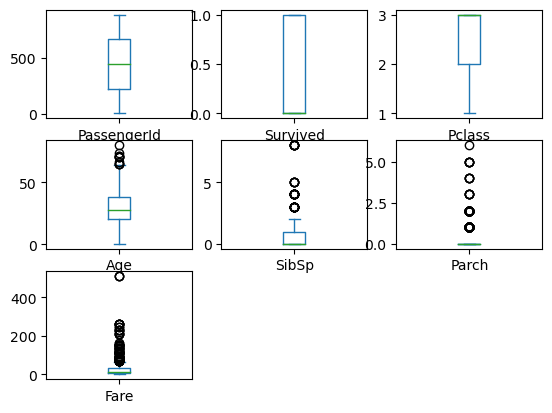

In [51]:
df.plot(kind='box',subplots=True,layout=(3,3))

<Figure size 500x500 with 0 Axes>

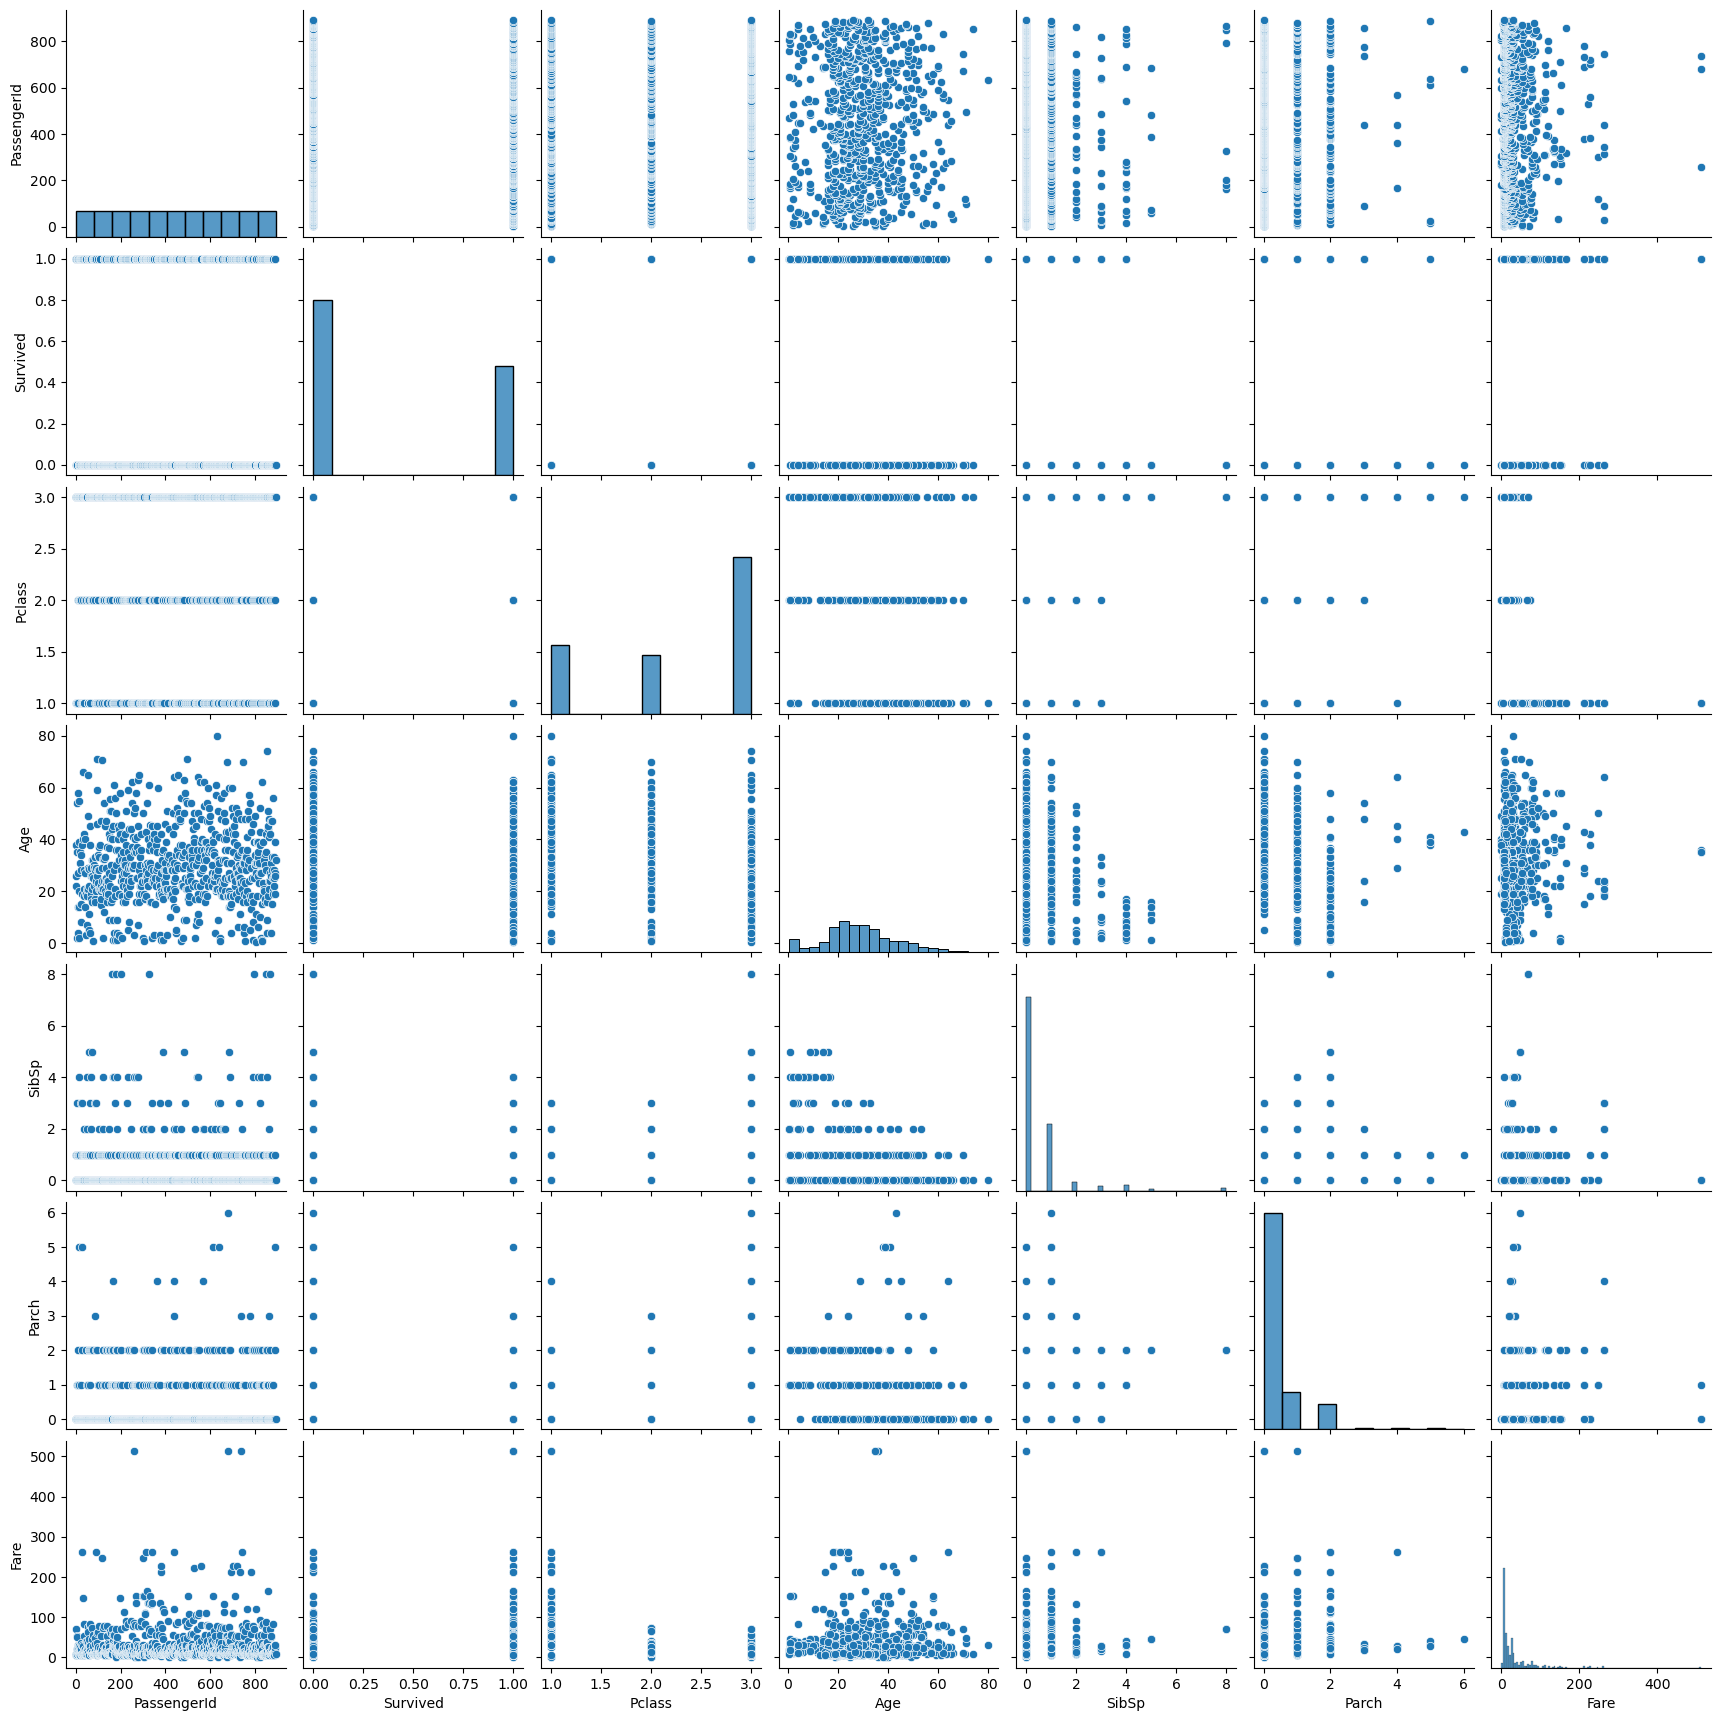

In [52]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df)

In [53]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
df['Cabin'].nunique()

147

In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
imps=SimpleImputer(strategy='most_frequent')
df['Embarked']=imps.fit_transform(df['Embarked'].values.reshape(-1,1))

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [61]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
df.drop('PassengerId',axis=1,inplace=True)

In [63]:
df.drop(['Name','Cabin'],axis=1,inplace=True)

In [64]:
df.drop('Ticket',axis=1,inplace=True)

In [65]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [66]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

In [67]:
df['Fare']=np.sqrt(df['Fare'])

In [68]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        2.085004
dtype: float64

In [69]:
df['Fare']=np.cbrt(df['Fare'])

In [70]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare       -0.957025
dtype: float64

In [71]:
df['Fare']=(df['Fare']**2)

In [72]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        1.230382
dtype: float64

In [73]:
from scipy.stats import boxcox
df['Fare']=boxcox(df['Fare'],0.5)

In [74]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare       -0.957025
dtype: float64

In [75]:
df['Fare']=1/(df['Fare'])

In [76]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare       -0.884984
dtype: float64

In [77]:
df['Fare']=np.exp(df['Fare'])

In [78]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        0.182445
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

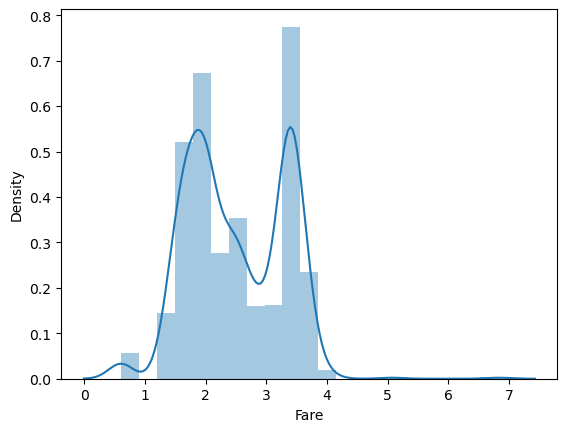

In [79]:
sns.distplot(df['Fare'])

In [80]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,3.589876,S
1,1,1,female,38.0,1,0,1.620134,C
2,1,3,female,26.0,0,0,3.365601,S
3,1,1,female,35.0,1,0,1.703421,S
4,0,3,male,35.0,0,0,3.329559,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,2.553262,S
887,1,1,female,19.0,0,0,1.926175,S
888,0,3,female,24.0,1,2,2.060027,S
889,1,1,male,26.0,0,0,1.926175,C


Removing Outliers

In [81]:
from scipy.stats import zscore

In [82]:
z=np.abs(df[['Age','Fare']])
z

,Age,Fare
0,22.0,3.589876
1,38.0,1.620134
2,26.0,3.365601
3,35.0,1.703421
4,35.0,3.329559
...,...,...
886,27.0,2.553262
887,19.0,1.926175
888,24.0,2.060027
889,26.0,1.926175


In [83]:
threshold=3
print(np.where(z>3))

(array([  0,   0,   1, ..., 889, 890, 890], dtype=int64), array([0, 1, 0, ..., 0, 0, 1], dtype=int64))


In [84]:
df.shape

(891, 8)

In [85]:
z=np.array(z)

In [86]:
z[0][0]

22.0

In [87]:
z[1][0]

38.0

In [88]:
z[1][1]

1.620133584999007

In [89]:
z

array([[22.        ,  3.58987569],
       [38.        ,  1.62013358],
       [26.        ,  3.36560068],
       ...,
       [24.        ,  2.06002721],
       [26.        ,  1.92617506],
       [32.        ,  3.41868522]])

In [90]:
df1=df[(z<3).all(axis=1)]

In [91]:
df1.shape

(23, 8)

In [92]:
print("Data Loss Percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage: 97.41863075196409


Since the data loss is very high we are not removing Outliers and work with the old dataframe

In [93]:
# Convert String data into categorical data with the help of Label encoder

In [94]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [95]:
df['Sex']=le.fit_transform(df['Sex'])

In [96]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [97]:
df['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32>

In [98]:
df['Embarked'].isnull().sum()

0

In [99]:
df_cor=df.corr()

In [100]:
 df_cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,-0.274048,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,0.686098,0.162098
Sex,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,0.217043,0.108262
Age,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,-0.119715,-0.000020
SibSp,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,-0.320203,0.068230
Parch,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,-0.332751,0.039798
Fare,-0.274048,0.686098,0.217043,-0.119715,-0.320203,-0.332751,1.000000,0.073689
Embarked,-0.167675,0.162098,0.108262,-0.000020,0.068230,0.039798,0.073689,1.000000


<AxesSubplot:>

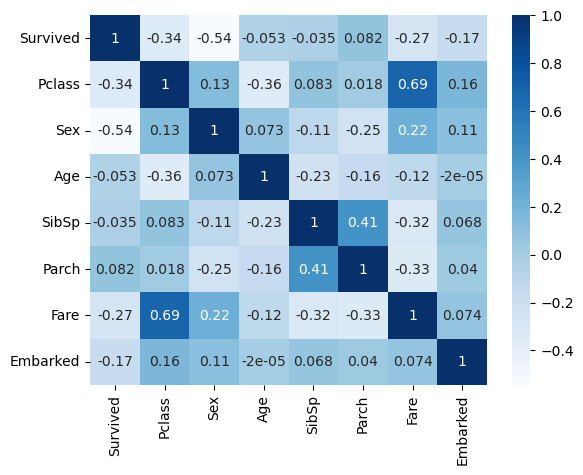

In [101]:
sns.heatmap(df_cor,annot=True,cmap='Blues')

In [102]:
df_cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Parch       0.081629
SibSp      -0.035322
Age        -0.052872
Embarked   -0.167675
Fare       -0.274048
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [103]:
df_cor['Age'].sort_values(ascending=False)

Age         1.000000
Sex         0.073377
Embarked   -0.000020
Survived   -0.052872
Fare       -0.119715
Parch      -0.155118
SibSp      -0.232411
Pclass     -0.356187
Name: Age, dtype: float64

In [104]:
df_cor['Fare'].sort_values(ascending=False)

Fare        1.000000
Pclass      0.686098
Sex         0.217043
Embarked    0.073689
Age        -0.119715
Survived   -0.274048
SibSp      -0.320203
Parch      -0.332751
Name: Fare, dtype: float64

In [105]:
#Now Separating Feature Columns and Target Columns

In [106]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,3.589876,2
1,1,1,0,38.0,1,0,1.620134,0
2,1,3,0,26.0,0,0,3.365601,2
3,1,1,0,35.0,1,0,1.703421,2
4,0,3,1,35.0,0,0,3.329559,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2.553262,2
887,1,1,0,19.0,0,0,1.926175,2
888,0,3,0,24.0,1,2,2.060027,2
889,1,1,1,26.0,0,0,1.926175,0


In [107]:
x=df.iloc[:,1:8]

In [108]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,3.589876,2
1,1,0,38.0,1,0,1.620134,0
2,3,0,26.0,0,0,3.365601,2
3,1,0,35.0,1,0,1.703421,2
4,3,1,35.0,0,0,3.329559,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,2.553262,2
887,1,0,19.0,0,0,1.926175,2
888,3,0,24.0,1,2,2.060027,2
889,1,1,26.0,0,0,1.926175,0


In [109]:
y=df.iloc[:,0]

In [110]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [111]:
x.shape

(891, 7)

In [112]:
y.shape

(891,)

Feature Scaling Using Standard Scaler

"""from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x"""

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["VIF Features"]=x.columns
vif

,VIF Values,VIF Features
0,23.510476,Pclass
1,3.111641,Sex
2,4.425701,Age
3,1.682378,SibSp
4,1.610001,Parch
5,26.696307,Fare
6,4.735530,Embarked


In [114]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [115]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [116]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [117]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [118]:
from imblearn.over_sampling import RandomOverSampler
ROS=RandomOverSampler()

In [119]:
x2,y2=ROS.fit_resample(x,y)

In [120]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [121]:
y2.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [123]:
MaxAcc=0
MaxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS=i

In [124]:
print('MaxACC=',MaxAcc,'MaxRS=',MaxRS)

MaxACC= 0.8696969696969697 MaxRS= 85


In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=MaxRS)

In [126]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


In [127]:
RFR=RandomForestClassifier()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
print(accuracy_score(y_test,pred_RFR))
print(confusion_matrix(y_test,pred_RFR))
print(classification_report(y_test,pred_RFR))

0.8022388059701493
[[144  30]
 [ 23  71]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       174
           1       0.70      0.76      0.73        94

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.81      0.80      0.80       268



In [128]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print(accuracy_score(y_test,pred_ETC))
print(confusion_matrix(y_test,pred_ETC))
print(classification_report(y_test,pred_ETC))

0.7873134328358209
[[142  32]
 [ 25  69]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       174
           1       0.68      0.73      0.71        94

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.79      0.79       268



In [129]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print(accuracy_score(y_test,pred_GBC))
print(confusion_matrix(y_test,pred_GBC))
print(classification_report(y_test,pred_GBC))


0.8134328358208955
[[152  22]
 [ 28  66]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       174
           1       0.75      0.70      0.73        94

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [130]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.7985074626865671
[[145  29]
 [ 25  69]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       174
           1       0.70      0.73      0.72        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [131]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

0.7873134328358209
[[142  32]
 [ 25  69]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       174
           1       0.68      0.73      0.71        94

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.79      0.79       268



In [132]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.7985074626865671
[[146  28]
 [ 26  68]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       174
           1       0.71      0.72      0.72        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [133]:
svm=SVC()
svm.fit(x_train,y_train)
pred_svm=svm.predict(x_test)
print(accuracy_score(y_test,pred_svm))
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))

0.6753731343283582
[[170   4]
 [ 83  11]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       174
           1       0.73      0.12      0.20        94

    accuracy                           0.68       268
   macro avg       0.70      0.55      0.50       268
weighted avg       0.69      0.68      0.59       268



In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
cv=5
cv_score=cross_val_score(RFR,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross_val_socre is:",accuracy_score(y_test,pred_RFR)-cv_score.mean())

[0.79329609 0.82022472 0.83146067 0.7752809  0.82022472]
0.808097420124286
Difference between accuracy score and cross_val_socre is: -0.005858614154136688


In [136]:
cv=5
cv_score=cross_val_score(ETC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy_score and cross_val_score:",accuracy_score(y_test,pred_ETC)-cv_score.mean())

[0.78212291 0.78089888 0.8258427  0.76966292 0.81460674]
0.7946268281965978
Difference between accuracy_score and cross_val_score: -0.007313395360776909


In [137]:
cv=5
cv_score=cross_val_score(GBC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference Between accuracy_score and cross_val_score:",accuracy_score(y_test,pred_GBC)-cv_score.mean())

[0.81005587 0.82022472 0.85393258 0.79213483 0.85955056]
0.8271797125102003
Difference Between accuracy_score and cross_val_score: -0.013746876689304743


In [138]:
cv=5
cv_score=cross_val_score(ABC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy_score and cross_val_score:",accuracy_score(y_test,pred_ABC)-cv_score.mean())

[0.75418994 0.82022472 0.80898876 0.81460674 0.83146067]
0.8058941686020965
Difference between accuracy_score and cross_val_score: -0.007386705915529368


In [139]:
cv=5
cv_score=cross_val_score(BC,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy_score and cross_val_score:",accuracy_score(y_test,pred_BC)-cv_score.mean())

[0.7877095  0.80337079 0.85393258 0.80337079 0.83146067]
0.8159688657334756
Difference between accuracy_score and cross_val_score: -0.02865543289765471


In [140]:
cv=5
cv_score=cross_val_score(LR,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy_score and cross_val_score:",accuracy_score(y_test,pred_LR)-cv_score.mean())

[0.79329609 0.78651685 0.78089888 0.75842697 0.81460674]
0.7867491055175444
Difference between accuracy_score and cross_val_score: 0.011758357169022737


In [141]:
cv=5
cv_score=cross_val_score(svm,x,y,cv=5)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy_score and cross_val_score:",accuracy_score(y_test,pred_svm)-cv_score.mean())

[0.63128492 0.63483146 0.63483146 0.64606742 0.65168539]
0.6397401293076392
Difference between accuracy_score and cross_val_score: 0.03563300502071898


Bagging Classifier is the best among all because accuracy is high and Difference is lowest

Hyper parameter Tuning

Bagging Classifier

In [148]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,4,7,9],
           'n_jobs':[1,4,6,8],
           'random_state':[2,5,3,9],
           'verbose': [1,5,8,10]}

In [149]:
GSV=GridSearchCV(BC,parameters,cv=5)
GSV.fit(x_train,y_train)

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 4 for this parallel run (total 4)...
Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...
Building estimator 1 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...
Building estimator 1 of 7 for this parallel run (total 7)...
Building estimator 2 of 7 for this parallel run (total 7)...
Building estimator 3 of 7 for this parallel run (total 7)...
Building estimator 4 of 7 for this parallel run (total 7)...
Building estimator 5 of 7 for this parallel run (total 7)...
Building estimator 6 of 7 for this parallel run (total 7)...
Building estimator 7 of 7 for this parallel run (total 7)...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...
Building estimator 1 of 9 for this parallel run (total 9)...
Building estimator 2 of 9 for this parallel run (total 9)...
Building estimator 3 of 9 for this parallel run (total 9)...
Building estimator 4 of 9 for this parallel run (total 9)...
Building estimator 5 of 9 for this parallel run (total 9)...
Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Building estimator 6 of 9 for this parallel run (total 9)...
Building estimator 7 of 9 for this parallel run (total 9)...
Building estimator 8 of 9 for this parallel run (total 9)...
Building estimator 9 of 9 for this parallel run (total 9)...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Don

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'n_estimators': [1, 4, 7, 9], 'n_jobs': [1, 4, 6, 8],
                         'random_state': [2, 5, 3, 9],
                         'verbose': [1, 5, 8, 10]})

In [150]:
GSV.best_params_

{'n_estimators': 4, 'n_jobs': 1, 'random_state': 5, 'verbose': 1}

In [152]:
Final_model=BaggingClassifier(n_estimators=4,n_jobs=1,random_state=5,verbose=1)
Final_model.fit(x_train,y_train)
predF=Final_model.predict(x_test)
acc=accuracy_score(y_test,predF)
print(acc*100)

79.8507462686567


In [155]:
import joblib
joblib.dump(Final_model,'Titanic_Survival')

['Titanic_Survival']

In [156]:
model=joblib.load('Titanic_Survival')

In [157]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0], dtype=int64)

In [159]:
conclusion=pd.DataFrame([Final_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,1,1,1,0
Original,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,1,0
